In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

In [2]:
data = pd.read_csv('dados_rpm_1_modificado.csv')

In [3]:
data_input = pd.read_csv('dados_senoide_1hz.csv')
# data_input = data_input['tensao']

In [4]:
resposta = data['rpm']

In [5]:
freq_de_corte = 0.01  # Ajuste conforme necessário
ordem = 2

# Obter os coeficientes do filtro Butterworth
b, a = butter(ordem, freq_de_corte, btype='low', analog=False)

# Aplicar o filtro aos dados
resposta_filtrada = filtfilt(b, a, resposta)
resposta_filtrada = pd.DataFrame(resposta_filtrada)
resposta_filtrada.head()

,0
0,115.181148
1,125.838807
2,136.649761
3,147.611341
4,158.720776


In [6]:
print(resposta_filtrada.iloc[300:].max(), resposta_filtrada.iloc[300:].min())

0    2118.272283
dtype: float64 0   -14.896537
dtype: float64


In [7]:
amostras = resposta_filtrada.values.flatten()
num_amostras = len(amostras)

In [8]:
import numpy as np
from scipy.signal import find_peaks

# Encontrar os índices dos picos positivos da senoide
peaks, _ = find_peaks(amostras)
# Calcular o número médio de amostras entre os picos
num_amostras_por_ciclo = np.mean(np.diff(peaks))

# A frequência de amostragem é o número de amostras por ciclo vezes a frequência da senoide
Fs = num_amostras_por_ciclo * 1
print(f"Frequência de amostragem estimada: {Fs} Hz")

Frequência de amostragem estimada: 1192.0 Hz


In [9]:
t = np.arange(0, num_amostras / Fs, 1 / Fs)
t = np.array(t)
t = pd.DataFrame(t)

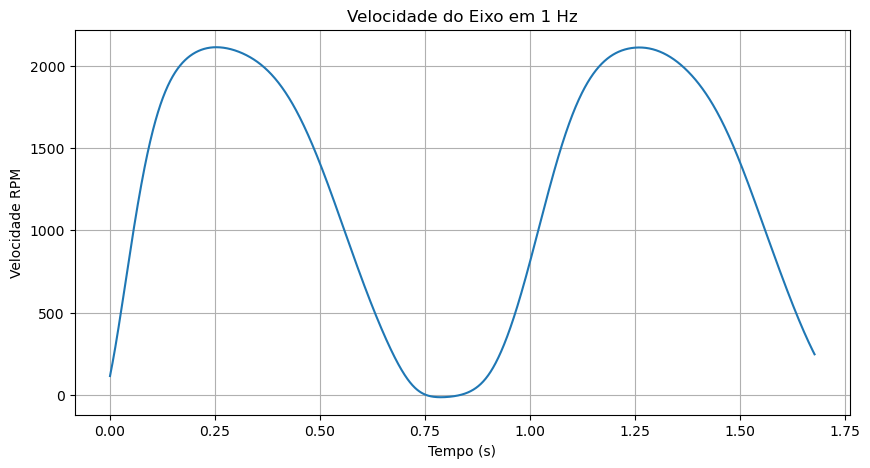

In [10]:
plt.figure(figsize=(10,5))
# plt.plot(data['tempo'].iloc[5:100], data['tensao'].iloc[5:100], label= 'Senoide Ts = 1ms')
plt.plot(t.iloc[:2000],resposta_filtrada.iloc[:2000])
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade RPM')
plt.title('Velocidade do Eixo em 1 Hz')
plt.grid()
plt.show()